In [2]:
import os
import glob
import numpy as np
from PIL import Image
Image.MAX_IMAGE_PIXELS=None
import pandas as pd
from natsort import natsorted

In [13]:
dlsrc = r'\\fatherserverdw\Q\research\images\skin_aging\DLCROP\DLCROP_processed'

In [14]:
dls = glob.glob(os.path.join(dlsrc,'*tif'))
dls = natsorted(dls)
dlims=[]
for dl in dls:
    dlim = Image.open(dl).histogram()
    dlims.append(dlim[1:13])

In [15]:
df = pd.DataFrame(dlims,columns=['corneum','spinosum','hairshaft','follicle','muscle','oil','sweat','nerve','blood','ecm','fat','white'])
df

,corneum,spinosum,hairshaft,follicle,muscle,oil,sweat,nerve,blood,ecm,fat,white
0,364716,637864,219195,200614,318563,89280,353425,94043,268947,13334930,1259017,562589
1,323174,807359,46583,118042,255520,130786,211596,81059,149871,13295896,1916390,934971
2,519146,1192651,22621,96131,387649,32599,185552,120884,189980,16806204,1982845,2327990
3,288795,726463,36658,62652,202173,138132,162210,80392,139189,11479179,1478392,715577
4,534147,1191371,20840,108531,401223,23105,222895,110684,233280,18296022,2488115,1457402
...,...,...,...,...,...,...,...,...,...,...,...,...
433,919584,3085129,62017,289628,853070,642917,806378,269173,1546901,79551746,2920859,11502024
434,106087,484357,143,4682,89112,240,211221,74105,270460,20695621,636855,3092269
435,110869,483239,61963,4195,87513,2846,194353,20738,608652,18614294,563242,3314250
436,138424,356078,21215,41231,100220,1750,194052,197593,253230,24767089,529131,4167329


In [5]:
dl = r'\\fatherserverdw\Q\research\images\skin_aging\1um\classification_v9_combined\12.tif'
roi = r'\\fatherserverdw\Q\research\images\skin_aging\annotation\roi\tif\12_tissue_binary.tif'

dl = Image.open(dl)
roi = Image.open(roi)

In [6]:
dlw, dlh = dl.size
roiw, roih = roi.size
dl.size,roi.size

((40938, 13840), (10235, 3460))

In [7]:
roi = roi.resize(dl.size)

In [8]:
from skimage.measure import label
roiarr = np.array(roi)
roiarrL = label(roiarr)

In [9]:
dlarr = np.array(dl)

In [12]:
dltmp = dlarr*(roiarrL==1)

NameError: name 'plt' is not defined

In [13]:
dlareas = np.histogram(dltmp,bins=range(14))
dlareas = dlareas[0]
dlareas = dlareas.tolist()

In [14]:
#epidermis, rest, collagen+gap, fat
dlareas2 = [dlareas[1]+dlareas[2]]+dlareas[3:10]+[dlareas[10]+dlareas[12]]+[dlareas[11]]

In [28]:
df = []


In [50]:
df.append([dlareas[1:10] + [dlareas[10] + dlareas[12]] + [dlareas[11]]])

In [55]:
df2 = pd.DataFrame(np.squeeze(df))
df2

,0,1,2,3,4,5,6,7,8,9,10
0,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
1,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
2,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
3,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
4,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553


In [52]:
df2.rename(columns={0: 'corneum', 1: 'spinosum', 2: 'shaft', 3: 'follicle', 4: 'muscle'
                    , 5: 'oil', 6: 'sweat', 7: 'nerve', 8: 'blood', 9: 'ecm'
                    , 10: 'fat'}, inplace=True)

In [56]:
df2

,0,1,2,3,4,5,6,7,8,9,10
0,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
1,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
2,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
3,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553
4,745301,754987,393315,75937,321645,89022,357141,93829,269182,14800956,1259553


In [3]:
json = pd.read_pickle(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\hovernet_out\df\12.pkl')

In [10]:
from openslide import OpenSlide
ndpi =OpenSlide(r'\\fatherserverdw\Q\research\images\skin_aging\wsi\12.ndpi')
ndpiw, ndpih = ndpi.dimensions
rsfw_ndpi2dl = ndpiw / dlw
rsfh_ndpi2dl = ndpih / dlh

In [4]:
json.head()

,bbox,centroid,contour,type,inroi,resident_area,Area,Perimeter,Circularity,MA,...,orientation,AspectRatio,Sol,Extent,EquiDia,imID,dist2nearest,oriA,oriB,local_align
0,"[[3835, 14642], [3846, 14654]]","[2360.0, 16128.29292929293]","[[2360, 16123], [2358, 16125], [2357, 16125], ...",11,0,262892697,82.5,35.556349,0.820030,10.066992,...,72.903610,0.884939,0.942857,0.625000,10.249013,12,523.003824,40.288479,169.040634,0.711506
1,"[[393, 18165], [401, 18176]]","[1785.5555555555557, 16780.537037037036]","[[1788, 16777], [1787, 16778], [1784, 16778], ...",11,0,262892697,41.0,28.142135,0.650548,5.635116,...,65.975677,0.546084,0.872340,0.465909,7.225152,12,356.265351,53.662609,22.568596,0.471928
2,"[[940, 15650], [952, 15660]]","[1318.536842105263, 15281.252631578947]","[[1317, 15276], [1316, 15277], [1315, 15277], ...",11,0,262892697,79.0,34.142135,0.851639,9.667659,...,176.771500,0.873265,0.957576,0.658333,10.029253,12,232.467202,28.623020,92.032227,0.749728
3,"[[965, 16018], [978, 16039]]","[1691.7692307692307, 15306.545454545454]","[[1684, 15301], [1682, 15303], [1682, 15305], ...",11,0,262892697,119.0,53.455844,0.523319,7.483922,...,112.582581,0.323593,0.853047,0.435897,12.309163,12,339.954409,107.223679,22.030060,0.630231
4,"[[1064, 15453], [1077, 15466]]","[1122.739837398374, 15406.032520325203]","[[1121, 15400], [1118, 15403], [1118, 15404], ...",11,0,262892697,105.5,39.213203,0.862179,11.485838,...,28.623020,0.952999,0.954751,0.624260,11.589943,12,184.382754,57.340168,71.713966,0.417430


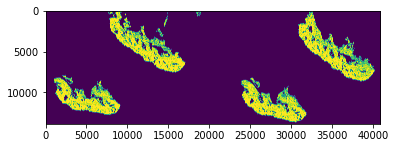

In [19]:
from skimage.morphology import remove_small_objects
from matplotlib import pyplot as plt
dltmp = dlarr==10
dltmp2 = remove_small_objects(dltmp,100000)
plt.imshow(dltmp2)

In [20]:
#distance from tissue components
import cv2
dist = cv2.distanceTransform(np.invert(dltmp2).astype(np.uint8), cv2.DIST_L2, 3)

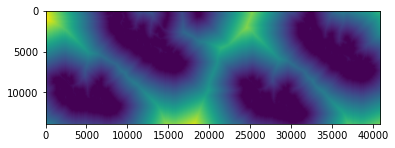

In [21]:
plt.imshow(dist)

In [18]:
dist[0,0]

2176.157

In [47]:
json.type.unique(),json.inroi.unique()

(array([11,  9, 10,  8,  5, 12,  7,  1,  2,  4,  3,  6], dtype=int64),
 array([0, 3, 1, 4, 2], dtype=int64))

In [60]:
tissueid = json.loc[0].type
sectionid = json.loc[0].inroi
tissueid,sectionid

(11, 0)

In [85]:
tissueid = tissueid-1

In [86]:
df2.loc[sectionid][tissueid]

1259553

In [101]:
def find_resident_area(tissueid,sectionid,dlareas):
    if tissueid==12: tissueid = 10
    tissueid = tissueid-1
    return dlareas.loc[sectionid][tissueid]

In [102]:
json['resident_area'] = json.apply(lambda x: find_resident_area(x.type,x.inroi,df2),axis=1)

In [103]:
json

,bbox,centroid,contour,type,inroi,Area,Perimeter,Circularity,MA,ma,...,AspectRatio,Sol,Extent,EquiDia,imID,dist2nearest,oriA,oriB,local_align,resident_area
0,"[[3835, 14642], [3846, 14654]]","[2360.0, 16128.29292929293]","[[2360, 16123], [2358, 16125], [2357, 16125], ...",11,0,82.5,35.556349,0.820030,10.066992,11.375920,...,0.884939,0.942857,0.625000,10.249013,12,523.003824,40.288479,169.040634,0.711506,1259553
1,"[[393, 18165], [401, 18176]]","[1785.5555555555557, 16780.537037037036]","[[1788, 16777], [1787, 16778], [1784, 16778], ...",11,0,41.0,28.142135,0.650548,5.635116,10.319130,...,0.546084,0.872340,0.465909,7.225152,12,356.265351,53.662609,22.568596,0.471928,1259553
2,"[[940, 15650], [952, 15660]]","[1318.536842105263, 15281.252631578947]","[[1317, 15276], [1316, 15277], [1315, 15277], ...",11,0,79.0,34.142135,0.851639,9.667659,11.070708,...,0.873265,0.957576,0.658333,10.029253,12,232.467202,28.623020,92.032227,0.749728,1259553
3,"[[965, 16018], [978, 16039]]","[1691.7692307692307, 15306.545454545454]","[[1684, 15301], [1682, 15303], [1682, 15305], ...",11,0,119.0,53.455844,0.523319,7.483922,23.127594,...,0.323593,0.853047,0.435897,12.309163,12,339.954409,107.223679,22.030060,0.630231,1259553
4,"[[1064, 15453], [1077, 15466]]","[1122.739837398374, 15406.032520325203]","[[1121, 15400], [1118, 15403], [1118, 15404], ...",11,0,105.5,39.213203,0.862179,11.485838,12.052315,...,0.952999,0.954751,0.624260,11.589943,12,184.382754,57.340168,71.713966,0.417430,1259553
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106861,"[[88288, 16531], [88307, 16542]]","[88215.72142857143, 16616.614285714284]","[[88216, 16608], [88215, 16609], [88215, 16610...",2,0,118.0,47.798990,0.649015,7.665721,21.463095,...,0.357158,0.932806,0.564593,12.257335,12,15.811388,44.186386,26.518534,0.445695,754987
106862,"[[88292, 16618], [88308, 16635]]","[88306.23489932886, 16619.187919463086]","[[88308, 16612], [88303, 16617], [88302, 16617...",2,0,127.0,50.284271,0.631174,8.912759,20.030390,...,0.444962,0.900709,0.466912,12.716187,12,15.264338,57.114277,48.256264,0.120804,754987
106863,"[[88292, 16556], [88307, 16570]]","[88242.78709677419, 16619.348387096776]","[[88244, 16612], [88243, 16613], [88242, 16613...",2,0,134.5,45.213203,0.826802,11.504786,16.268103,...,0.707199,0.953901,0.640476,13.086280,12,20.591260,44.186386,12.256205,0.566185,754987
106864,"[[88297, 16515], [88310, 16523]]","[88198.01492537314, 16622.671641791043]","[[88199, 16617], [88196, 16620], [88196, 16621...",10,0,52.0,32.142135,0.632505,5.374184,14.881341,...,0.361136,0.954128,0.500000,8.136858,12,18.027756,18.307768,44.186386,0.445695,14800956
